In [16]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
documents = [
    "Unlike classification or prediction, which analyzes data objects with class labels, clustering analyzes data objects without consulting a known class label. The class labels are not in the data  because they are not known.",
    "Classification can be used for prediction of class labels of data objects. However, in many applications, prediction of missing or not known data values rather than class labels is performed to fit  data objects into a schema.",
"Sun Salutation, a ritual performed in the early morning, combines seven different postures. The sun, the life generator, is invoked by this Yogic exercise, an easy way to keep fit."
]
stopwords = [ "a", "an", "are", "be", "because", "by", "can", "for", "however", "in", "into", "is", "keep", "many", "not", "of", "or", "rather", "than", "the", "they", "this", "to", "unlike", "used", "way", "which", "with", "without", ",","."]

def cosine_sim(x,y):
    den = np.sqrt((x**2).sum() ) * np.sqrt((y**2).sum() )
    cos = (x * y).sum() / den
    return cos



In [17]:
words = set()
vectors = []
for i, phrase in enumerate(documents):
    #print(i,phrase.lower())
    documents[i] = " ".join([p.replace(",","").replace(".","") for p in phrase.lower().split() if p not in stopwords])
    words.update(documents[i].split())
words = list(words)
for phrase in documents:
    p = phrase.split()
    vectors.append( np.array( [ p.count(w) for w in words  ] ))

In [18]:
print(cosine_sim(vectors[0],vectors[1]))
print(cosine_sim(vectors[0],vectors[2]))
print(cosine_sim(vectors[1],vectors[2]))

0.7689290509335256
0.0
0.07669649888473704


In [21]:
# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words=stopwords)
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['0', '1', '2'])
df

from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df, df))

[[1.         0.76892905 0.        ]
 [0.76892905 1.         0.0766965 ]
 [0.         0.0766965  1.        ]]


# Entropy and classification

Consider the following dataset with 8 documents d1 to d8 and features/attributes f1 to f3
D	f1	f2	f3	C
d1	2	0	0	1
d2	2	0	0	1
d3	0	0	0	2
d4	0	1	0	2
d5	0	2	0	3
d6	0	2	0	3
d7	0	1	1	3
d8	0	2	1	3

 What  is  the  entropy  over  the  categories  for  these  training  instances  d1to  d8?   Recall  that  the  entropy  of  a  partitionTis  given  asH(T)  =−∑jP (Tj)·log2P (Tj).  
 UseLog2.

 Using the training set d1 to d8, suppose we want to construct a decisiontree for the binary classification of the category c3 (“Stochastics”),  
 i.e.,the tree decides whether a new document belongs to c3 category or not,using binary splits. 
 Determine the split with the highest information gain for binary split at the root level.  
 Recall Information gain formula 
 G(k, k1, k2) =H(k)− k1 /k H(k1) − k2/k * H(k2)
 
 f1≥1 f2≥1 f3≥1
 f1≥2 f2≥2 f3≥2
 f1≥3 f2≥3 f3≥3


In [28]:
import pandas as pd
import numpy as np
df = pd.read_csv("DT_2.csv")
df = df.set_index(df.columns[0])
label_col = df.columns[-1]
feat_cols = df.columns[0:-1]
df

,Heavy,Smelly,Spotted,Scales,Poisonous
Sample,,,,,
a,0,0,0,0,0
b,0,0,1,0,0
c,1,1,0,1,0
d,1,0,0,1,1
e,0,1,1,0,1
f,0,0,1,1,1
g,0,0,0,1,1
h,1,1,0,0,1


In [56]:
def entropy(d):
    classes = d.unique()
    n = len(d)
    entropy = 0
    for c in classes:
        c_n = len(d[d == c])
        p = c_n/n
        entropy += -p * np.log2(p)
    return entropy

def info_gain(d,col, n_compare):
    n = len(d)
    node_lt = d[d[col] < n_compare] # less than
    node_gt = d[d[col] >= n_compare] # greater than
    n_lt = len(node_lt)
    n_gt = len(node_gt)
    gain =   (0 if n_lt == 0 else n_lt/n*entropy(node_lt[label_col]) )  +  (0 if n_gt == 0 else n_gt/n*entropy(node_gt[label_col]) )
    return gain
root_entropy = entropy(df[label_col])
print(root_entropy)
compare_features =  [0,1] #=[1,2,3]
gain_df = pd.DataFrame(columns=feat_cols,index=compare_features)
gain_df.index.name = 'Gain'
#df['C'] = df['C'].apply(lambda x: 0 if x < 3 else x)
for col in gain_df.columns:
    for idx in gain_df.index:
        gain_df[col][idx] = root_entropy - info_gain(df[[col,label_col]],col,idx)
gain_df

0.954434002924965
0.954434002924965
0.9512050593046015
0.954434002924965
0.9512050593046015
0.954434002924965
0.9512050593046015
0.954434002924965
0.9056390622295665


,Heavy,Smelly,Spotted,Scales
Gain,,,,
0,0.0,0.0,0.0,0.0
1,0.003229,0.003229,0.003229,0.048795


# Decision Tree

Construct a decision tree given the following training data set.
Outlook     Temp    Humidity    Windy   Play
sunny       85      85          false   No  
sunny       80      90          true    No
overcast    83      78          false   Yes 
rain        70      96          false   Yes 
rain        68      80          false   Yes
rain        65      70          false   Yes 
overcast    64      65          true    Yes 
sunny       72      95          false   No  
sunny       69      70          false   Yes 
rain        75      80          false   Yes 
sunny       75      70          true    Yes 
overcast    72      90          true    Yes 
overcast    81      75          false   Yes 
rain        71      80          true    No


Outlook: categorical (sunny, overcast, rain)
Temperature continuous (in Fahrenheit)
Humidity continuous (percentage)
Windy categorical (true, false)
Play categorical class/label/target (Yes, No)

In [222]:
cols = ['Outlook', 'Temp', 'Humidity', 'Windy', 'Play']
data = [
        [ 'sunny',      85,     0.85,   False   , 0 ],
        [ 'sunny',      80,     0.90,   True    , 0 ],
        [ 'overcast',   83,     0.78,   False   , 1 ],
        [ 'rain',       70,     0.96,   False   , 1 ],
        [ 'rain',       68,     0.80,   False   , 1 ],
        [ 'rain',       65,     0.70,   False   , 1 ],
        [ 'overcast',   64,     0.65,   True    , 1 ],
        [ 'sunny',      72,     0.95,   False   , 0 ],
        [ 'sunny',      69,     0.70,   False   , 1 ],
        [ 'rain',       75,     0.80,   False   , 1 ],
        [ 'sunny',      75,     0.70,   True    , 1 ],
        [ 'overcast',   72,     0.90,   True    , 1 ],
        [ 'overcast',   81,     0.75,   False   , 1 ],
        [ 'rain',       71,     0.80,   True    , 0 ]
        ]

w_df = pd.DataFrame(data=data,columns=cols)
w_df

,Outlook,Temp,Humidity,Windy,Play
0,sunny,85,0.85,False,0
1,sunny,80,0.90,True,0
2,overcast,83,0.78,False,1
3,rain,70,0.96,False,1
4,rain,68,0.80,False,1
5,rain,65,0.70,False,1
6,overcast,64,0.65,True,1
7,sunny,72,0.95,False,0
8,sunny,69,0.70,False,1
9,rain,75,0.80,False,1


In [279]:
class Tree:
    def __init__(self,data,label_col):
        self.data = data
        self.label_col = label_col
        
        self.classes = data.groupby(self.label_col)[self.label_col].count()
        self.default_class = self.classes[self.classes == self.classes.max()].index[0]
        self.R = [x for x in data.columns if x != label_col]  
        self.root = Node(self,None,self.R,None,self.data)
        self.root.ID3()
        
class Node:
    def __init__(self,tree,parent,R,C,S):
        '''
            R: set of attributes
            C: target attribute
            S: training set
            Returns a decision tree
        '''
        self.R = R
        self.C = C
        self.S = S
        self.tree = tree
        self.parent = parent
        self.children = []
        self.is_leaf = False
        self.attribute = None
        self.value = None
        self.comparator = None
        self.label = None
        
    def __str__(self):
        node_str =  f"{self.attribute}, {self.value}, {self.is_leaf},{self.comparator}"
        for child in self.children:
            node_str += '\n' + str(child)
        return node_str
            
                
    def entropy(self,d):
        label_col = self.tree.label_col
        classes = d[label_col].unique()
        n = len(d)
        entropy = 0
        for c in classes:
            c_n = len(d[d[label_col] == c])
            p = c_n/n
            entropy += -p * np.log2(p)
        return entropy
        
    def info_gain(self,d,col):
            label_col = self.tree.label_col
            n = len(d)
            root_entropy = entropy(d[label_col])
            gain = 0
            attrs = d[col].unique()
            split_attr = None
            if d[col].dtype == 'O'  or d[col].dtype == 'bool':
                gain  = root_entropy
                for attr in attrs:
                    node_attr = d[d[col] == attr] 
                    n_attr = len(node_attr)
                    gain -= (0 if n_attr == 0 else n_attr / n*entropy(node_attr[label_col]) )
            else: # data is not categorical
                for attr in attrs:
                    node_lt = d[d[col] < attr] # less than
                    node_gt = d[d[col] >= attr] # greater than
                    n_lt = len(node_lt)
                    n_gt = len(node_gt)
                    g  =  root_entropy \
                        - (0 if n_lt == 0 else n_lt/n*entropy(node_lt[label_col]) ) \
                        - (0 if n_gt == 0 else n_gt/n*entropy(node_gt[label_col]) )
                    if g > gain:
                        gain = g
                        split_attr = attr
            return gain,split_attr
        
    def ID3(self):
        label_col = self.tree.label_col
        if len(self.S) == 0:
            self.attribute = self.C
            self.label =  self.tree.default_class
            self.is_leaf = True
            return
        s_classes = self.S.groupby(label_col)[label_col].count()
        if len(self.R) == 0:
            s_classes = s_classes[s_classes == s_classes.max()]
            n = s_classes[s_classes.index[0]]
            self.is_leaf = True
            self.attribute = self.C
            self.label = s_classes.index[0]
            return
            node = Node(self.tree,self,None,c,None)
            self.children.append(node)
            
        if len(s_classes) == 1:
            self.is_leaf = True
            self.label = s_classes.index[0]
            self.attribute = self.C
            return
            #node = Node(self.tree,self,None,c,None)
            #self.children.append(node)
        gain_r = pd.DataFrame(data =[[0]*len(self.R)], columns = self.R)
        split_attrs = dict()
        for r in self.R:
             g, split_attr = self.info_gain(self.S[[r,label_col]],r)
             gain_r[r] = g
             split_attrs[r] = split_attr
        gain_r_t = gain_r.transpose()
        max_r = gain_r_t.idxmax()[0]
        r = [x for x in self.R if x != max_r]
        if self.S[max_r].dtype == 'O'  or self.S[max_r].dtype == 'bool':
            attrs = self.S[max_r].unique()
            for attr in attrs:
                node = Node(self.tree,self,r,max_r,self.S[self.S[max_r] == attr])
                node.comparator == "=="
                node.attribute == max_r
                node.value == attr
                self.children.append(node)
                node.ID3()
        else: # data is not categorical
            split_attr = split_attrs[max_r]
            print(split_attrs)
            s_lt = self.S[self.S[max_r] < split_attr] # less than
            s_gt = self.S[self.S[max_r] >= split_attr] # greater than
            node_lt = Node(self.tree,self,r,max_r,s_lt)
            node_lt.comparator == "<"
            node_gt = Node(self.tree,self,r,max_r,s_gt)
            node_gt.comparator == ">="
            node_gt.value = split_attr
            node_lt.value = split_attr
            self.children.append(node_lt)
            self.children.append(node_gt)
            node_lt.ID3()
            node_gt.ID3()
        

In [280]:

classes = w_df.groupby('Play')['Play'].count()
classes[classes == classes.max()].index[0]
tree = Tree(w_df,'Play')

{'Outlook': None, 'Temp': 71, 'Humidity': 0.8, 'Windy': None}


In [281]:
tree.root.children[0].S

,Outlook,Temp,Humidity,Windy,Play
2,overcast,83,0.78,False,1
5,rain,65,0.70,False,1
6,overcast,64,0.65,True,1
8,sunny,69,0.70,False,1
10,sunny,75,0.70,True,1
12,overcast,81,0.75,False,1


In [283]:
print(tree.root)

None, None, False,None
Humidity, 0.8, True,None
None, 0.8, False,None
Outlook, None, True,None
None, None, False,None
Windy, None, True,None
Windy, None, True,None
Outlook, None, True,None


# Model Evaluation

In [318]:
cols = ['Pred','GT']
data= [
    ["Yes", "No"],
    ["No",  "No"],
    ["Yes", "Yes"],
    ["No",  "Yes"],
    ["No",  "Yes"],
    ["Yes", "Yes"],
    ["Yes", "Yes"],
    ["No",  "No"],
    ["Yes", "Yes"],
    ["Yes", "Yes"],
    ["Yes", "Yes"],
    ["Yes", "Yes"],
    ["Yes", "Yes"],
    ["Yes", "No"]
    ]

df = pd.DataFrame(data,columns=cols)
df
cs_cols = ['Actual','Yes',"No"]
cs_data = [
        ['Yes',0,0],
        ['No',0,0]
]
cs = pd.DataFrame(cs_data,columns=cs_cols)
cs = cs.set_index('Actual')

for c_r in cs.columns:
    for c_c in cs.columns:
        cs[c_r][c_c] = df[ (df['Pred'] == c_r) & (df["GT"] ==c_c) ].shape[0]

accuracy = ( cs["Yes"]["Yes"] + cs["No"]["No"]) / \
    (
            cs["Yes"]["Yes"] + cs["Yes"]["No"] + cs["No"]["Yes"] +  cs["No"]["No"] 
    )
        
precision = cs["Yes"]["Yes"] / (cs["Yes"]["Yes"] + cs["Yes"]["No"])
recall = cs["Yes"]["Yes"] / (cs["Yes"]["Yes"] + cs["No"]["Yes"])
f1_score = 2 * (precision * recall)/(precision + recall)

TPR = cs["Yes"]["Yes"] / (cs["Yes"]["Yes"] + cs["Yes"]["No"])
FPR = cs["No"]["Yes"] / (cs["No"]["No"] + cs["No"]["Yes"])

random_probs = [0 for _ in range(len(df))]

print('Accuracy ' , accuracy)
print('Precision ' , precision)
print('Recall ' , recall)
print('F1 ' , f1_score)
print('FPR ' , FPR,"TPR",TPR)


    




Accuracy  0.7142857142857143
Precision  0.8
Recall  0.8
F1  0.8000000000000002
FPR  0.5 TPR 0.8


# Rule Based Classifier

# Naive Bayes



In [67]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
df = pd.read_csv("NB_2.csv",index_col=False)
df['Outlook'] = df['Outlook'].apply(lambda x:0 if x == 'sunny' else 1 if x == 'overcast' else 2 if x == 'rain' else 0)
df['Windy'] = df['Windy'].apply(lambda x:0 if x == False else 1)
X = df[df.columns[0:-1]]
y = df[df.columns[-1]]
gnb = GaussianNB()
gnb_fit = gnb.fit(X, y)
pred = gnb_fit.predict([[1,70,0.65,1]])
pred

array([1], dtype=int64)

In [83]:
df = pd.read_csv('NB_1.csv',index_col=False)
X = df[df.columns[0:-1]]
y = df[df.columns[-1]]
gnb = GaussianNB()
gnb_fit = gnb.fit(X, y)
pred = gnb_fit.predict([[0,1,0],[1,0,1]])
for p in pred:
    print(p)

pred = gnb_fit.predict_proba([
        [0,1,0],
        [1,0,1]
     ])
for p in pred:
    print(p)

1
1
[0.34248657 0.65751343]
[0.34248657 0.65751343]


In [100]:
def cond_prob(df,vals):
    label_col = df.columns[-1]
    classes = df[label_col].unique()
    n = len(df[label_col])
    p_vals = dict()
    for c in classes:
        df_c = df[df[label_col] == c]
        n_c = len(df_c)
        p_vals[c] = n_c/n
        for val in vals:
            df_val = df_c[ df_c[val] == vals[val]]
            n_val = len(df_val)
            p_vals[c] *= n_val/n_c
    return p_vals
        

print(cond_prob(df,{'X':0,'Y':1,'Z':0}))
print(cond_prob(df,{'X':1,'Y':0,'Z':1}))

{1: 0.06666666666666665, 0: 0.037500000000000006}
{1: 0.06666666666666665, 0: 0.037500000000000006}


# Neural Network

In [189]:
def relu(x):
    return x if x > 0 else 0
input = np.array([ 2,4])
input = np.insert(input, 0, 1, axis=0)
w1 = np.array([[1,1,2],[1,2,4]])
w2 = np.array([[1,1,2]])
h_l = (input * w1).sum(axis=1)
h_l = np.vectorize(relu)(h_l)
h_l = np.insert(h_l,0,1,axis=0)
y =  (h_l * w2).sum(axis=1)
loss = (26-y)**2
loss


array([784], dtype=int32)

In [231]:
import tensorflow as tf
w1 = tf.constant([[1,2,3],[2,-1,2]])
w2 = tf.constant([[1,1],[1,-3],[1,2]])
w3 = tf.constant([[1,1],[1,-1]])
w4 = tf.constant([[1],[-1]])
b1 = tf.constant([1,1,0])
b2 = tf.constant([0,1])
b3 = tf.constant([-1,1])
b4 = tf.constant([1])
x = tf.constant([[-1,1]])

h1 = tf.nn.relu(tf.add(tf.matmul(x,w1),b1))
h2 = tf.nn.relu(tf.add(tf.matmul(h1,w2),b2))
h3 = tf.nn.relu(tf.add(tf.matmul(h2,w3),b3))
h4 = tf.nn.relu(tf.add(tf.matmul(h3,w4),b4))
print(tf.matmul(x,w1))
print(tf.add(tf.matmul(x,w1),b1))
print(h4)

tf.Tensor([[ 1 -3 -1]], shape=(1, 3), dtype=int32)
tf.Tensor([[ 2 -2 -1]], shape=(1, 3), dtype=int32)
tf.Tensor([[5]], shape=(1, 1), dtype=int32)


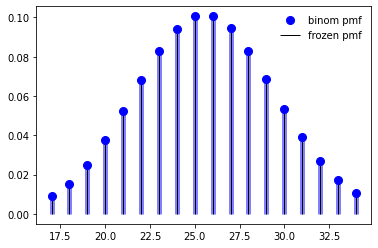

array([0.00886767, 0.01543631, 0.02491475, 0.03737212, 0.05220233,
       0.06802122, 0.08280844, 0.09430961, 0.10059692, 0.10059692,
       0.09438723, 0.08315066, 0.06881434, 0.05352226, 0.03913456,
       0.02690501, 0.01739314, 0.0105723 ])

In [207]:
import math
import random
import sys
import matplotlib.pyplot as plt
n = 32
vals = []
for i in range(n):
    rnd = random.randint(0,sys.maxsize)
    vals.append(rnd)
vals

from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
n, p = 64, 0.4
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()
rv.pmf(x)

In [218]:
##See for further information https://math.stackexchange.com/questions/3579001/prove-the-maximum-value-of-entropy-function

factor = 0
n = 32
x  = [1/n for i in range(1,n+1)]
sum(x)
h = 0
for i in x:
    h += -i * (0 if i == 0 else math.log2(i)) 
h

5.0

# Tensorflow

In [221]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(5, 5, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(10))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 3, 3, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

In [315]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()            

NameError: name 'SVC' is not defined

In [369]:
docs = [
'Peter Piper picked a peck of pickled peppers',
'Peter picked a big peck of pickled peppers',
'Peter Piper picked a peck of mixed peppers']

S = []
shingles = []
for d in docs:
    d = d.lower()
    d_shingle = []
    words = d.split(' ')
    #words = d.replace(' ', '')
    n_words = len(words)
    for i in range(n_words):
        if i  < n_words-1:
            n_gram = words[i] + words[i+1]
            if n_gram not in S:
                S.append(n_gram)
            d_shingle.append(n_gram)
    shingles.append(set(d_shingle))

def jaccard (d1,d2):
    return len( d1.intersection(d2)) / len(d1.union(d2))

print(jaccard(shingles[0],shingles[1]))
print(jaccard(shingles[0],shingles[2]))
print(jaccard(shingles[1],shingles[2]))

data = [ [int(s in shingle)  for s in S] for shingle in shingles ]
df = pd.DataFrame(data = data, columns = S)
doc_labels = ['S'+ str(i) for i in range(len(df))]
df['Docs'] = doc_labels
df = df.set_index('Docs')
df = df.T
df
perms = ['Perm1', 'Perm2']
df[perms[0]] = [(8 * x + 9)%47  for x in range(1,len(df)+1)]
df[perms[1]] = [(2 * x + 4)%47  for x in range(1,len(df)+1)]


0.4
0.5555555555555556
0.16666666666666666


In [370]:
df

Docs,S0,S1,S2,Perm1,Perm2
peterpiper,1,0,1,17,6
piperpicked,1,0,1,25,8
pickeda,1,1,1,33,10
apeck,1,0,1,41,12
peckof,1,1,1,2,14
ofpickled,1,1,0,10,16
pickledpeppers,1,1,0,18,18
peterpicked,0,1,0,26,20
abig,0,1,0,34,22
bigpeck,0,1,0,42,24


In [374]:
signatures = []
for label in doc_labels:
    signature = []
    for perm in perms:
        for i in df[perm].sort_values():
            cell_value = df[label][df.index[df[perm] == i]][0]
            if(cell_value == 1):
                signature.append(i)
                break
    signatures.append(set(signature))
print(signatures)
print(jaccard(signatures[0],signatures[1]))
print(jaccard(signatures[0],signatures[2]))
print(jaccard(signatures[1],signatures[2]))

[{2, 6}, {2, 10}, {2, 6}]
0.3333333333333333
1.0
0.3333333333333333
